In [2]:
import json
from matplotlib import pyplot as plt
from utils.plotting_tools import plot_cs_vqe_convergence, plot_cs_vqe_convergence_alt

/home/tim/anaconda3/lib/python3.7/site-packages/qiskit/aqua/components/optimizers/optimizer.py:50: DeprecationWarning: The package qiskit.aqua.components.optimizers is deprecated. It was moved/refactored to qiskit.algorithms.optimizers (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  'qiskit.algorithms.optimizers', 'qiskit-terra')


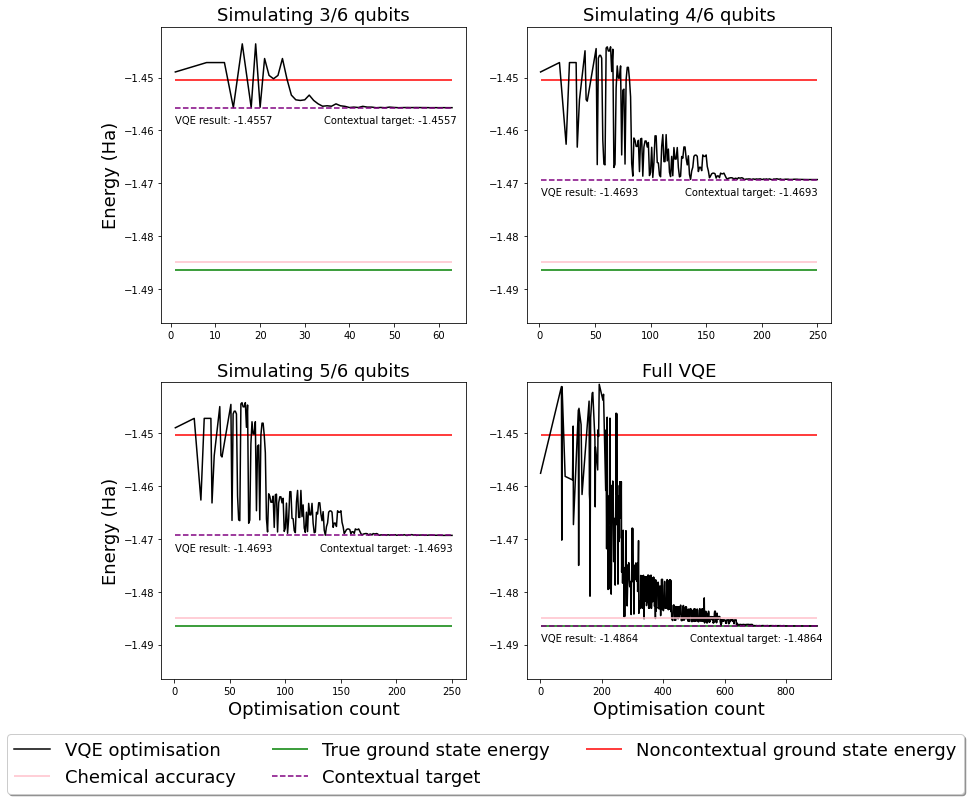

In [2]:
file = 'H3_STO-3G_SINGLET_UCCSD_CS-VQE_convergence_projected_ansatz'
with open('data/final/'+file+'.json', 'r') as json_file:
    cs_vqe_data = json.load(json_file)
    
fig = plot_cs_vqe_convergence_alt(cs_vqe_data, max_num_plots=4)
fig.savefig('plots/final/'+file+'.png', dpi=300, bbox_inches='tight')

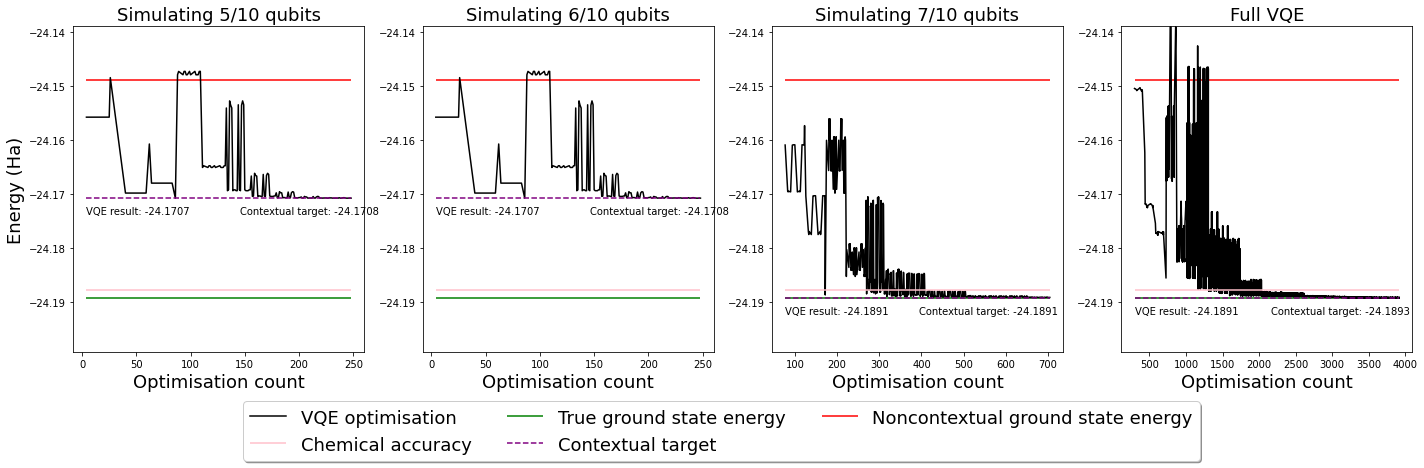

In [4]:
file='B+_STO-3G_SINGLET_UCCSD_CS-VQE_convergence_projected_ansatz'
with open('data/final/'+file+'.json', 'r') as json_file:
    cs_vqe_data = json.load(json_file)
    
fig = plot_cs_vqe_convergence_alt(cs_vqe_data, 'CS-VQE convergence: B+ STO-3G singlet, reduced UCCSD Ansatz', max_num_plots=4, plot_index=[4,5,6,9],x=4,y=1)
fig.savefig('plots/final/'+file+'.png', dpi=300, bbox_inches='tight')

In [ ]:
file='N+_STO-3G_SINGLET_UCCSD_CS-VQE_convergence_projected_ansatz'
with open('data/final/'+file+'.json', 'r') as json_file:
    cs_vqe_data = json.load(json_file)
    
fig = plot_cs_vqe_convergence_alt(cs_vqe_data, 'CS-VQE convergence: N+ STO-3G singlet, reduced UCCSD Ansatz', max_num_plots=8)
fig.savefig('plots/final/'+file+'.png', dpi=300, bbox_inches='tight')

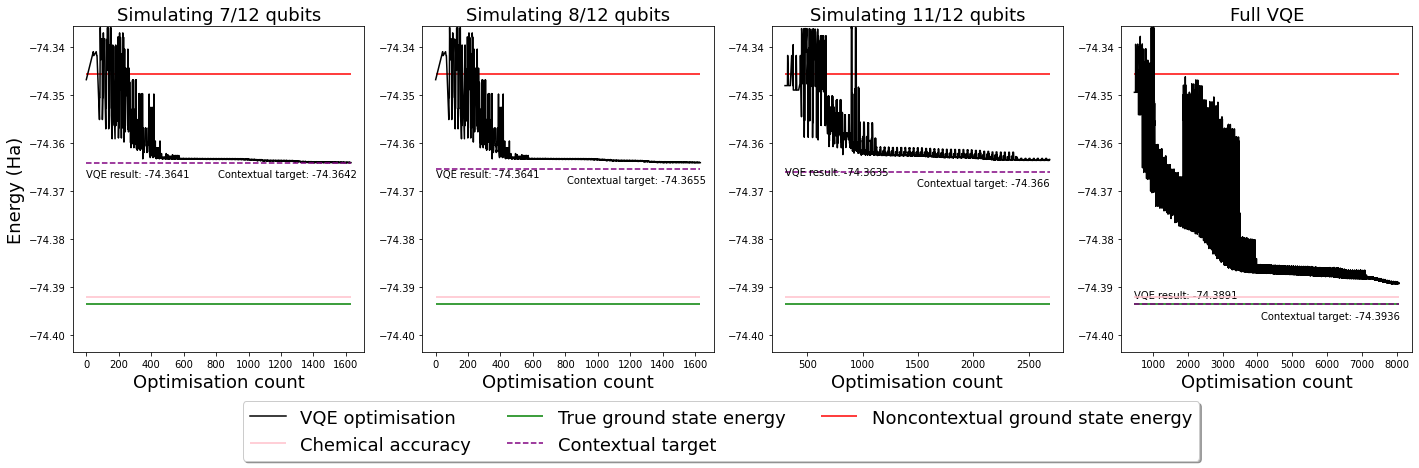

In [8]:
file='OH+_STO-3G_SINGLET_UCCSD_CS-VQE_convergence_projected_ansatz'
with open('data/final/'+file+'.json', 'r') as json_file:
    cs_vqe_data = json.load(json_file)
    
fig = plot_cs_vqe_convergence_alt(cs_vqe_data, 'CS-VQE convergence: OH+ STO-3G singlet, reduced UCCSD Ansatz', max_num_plots=4, plot_index=[6,7,10,11],x=4,y=1)
fig.savefig('plots/final/'+file+'.png', dpi=300, bbox_inches='tight')

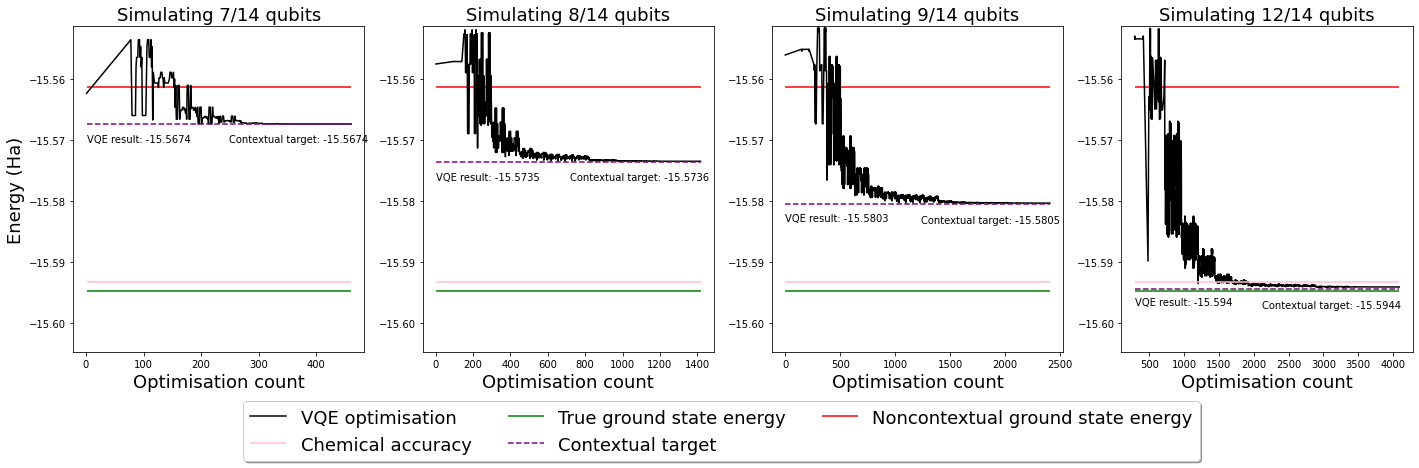

In [5]:
file='BeH2_STO-3G_SINGLET_UCCSD_CS-VQE_convergence_projected_ansatz'
with open('data/final/'+file+'.json', 'r') as json_file:
    cs_vqe_data = json.load(json_file)
    
fig = plot_cs_vqe_convergence_alt(cs_vqe_data, 'CS-VQE convergence: BeH2 STO-3G singlet, reduced UCCSD Ansatz', max_num_plots=4, plot_index=[6,7,8,11], x=4,y=1)
fig.savefig('plots/final/'+file+'.png', dpi=300, bbox_inches='tight')

In [3]:
mol_data_sets = ["H3_STO-3G_SINGLET_UCCSD_CS-VQE_convergence_projected_ansatz",
                 "H2_3-21G_SINGLET_UCCSD_CS-VQE_convergence_projected_ansatz",
                 "B+_STO-3G_SINGLET_UCCSD_CS-VQE_convergence_projected_ansatz",
                 "N+_STO-3G_SINGLET_UCCSD_CS-VQE_convergence_projected_ansatz",
                 "OH+_STO-3G_SINGLET_UCCSD_CS-VQE_convergence_projected_ansatz",
                 "Be_STO-3G_SINGLET_UCCSD_CS-VQE_convergence_projected_ansatz",
                "H2O_STO-3G_SINGLET_UCCSD_CS-VQE_convergence_projected_ansatz",
                "LiH_STO-3G_SINGLET_UCCSD_CS-VQE_convergence_projected_ansatz",
                "BeH2_STO-3G_SINGLET_UCCSD_CS-VQE_convergence_projected_ansatz",
                "O_STO-3G_SINGLET_UCCSD_CS-VQE_convergence_projected_ansatz",
                "Li_STO-3G_SINGLET_UCCSD_CS-VQE_convergence_projected_ansatz"]

In [5]:
def find_nth(haystack, needle, n):
    start = haystack.find(needle)
    while start >= 0 and n > 1:
        start = haystack.find(needle, start+len(needle))
        n -= 1
    return start

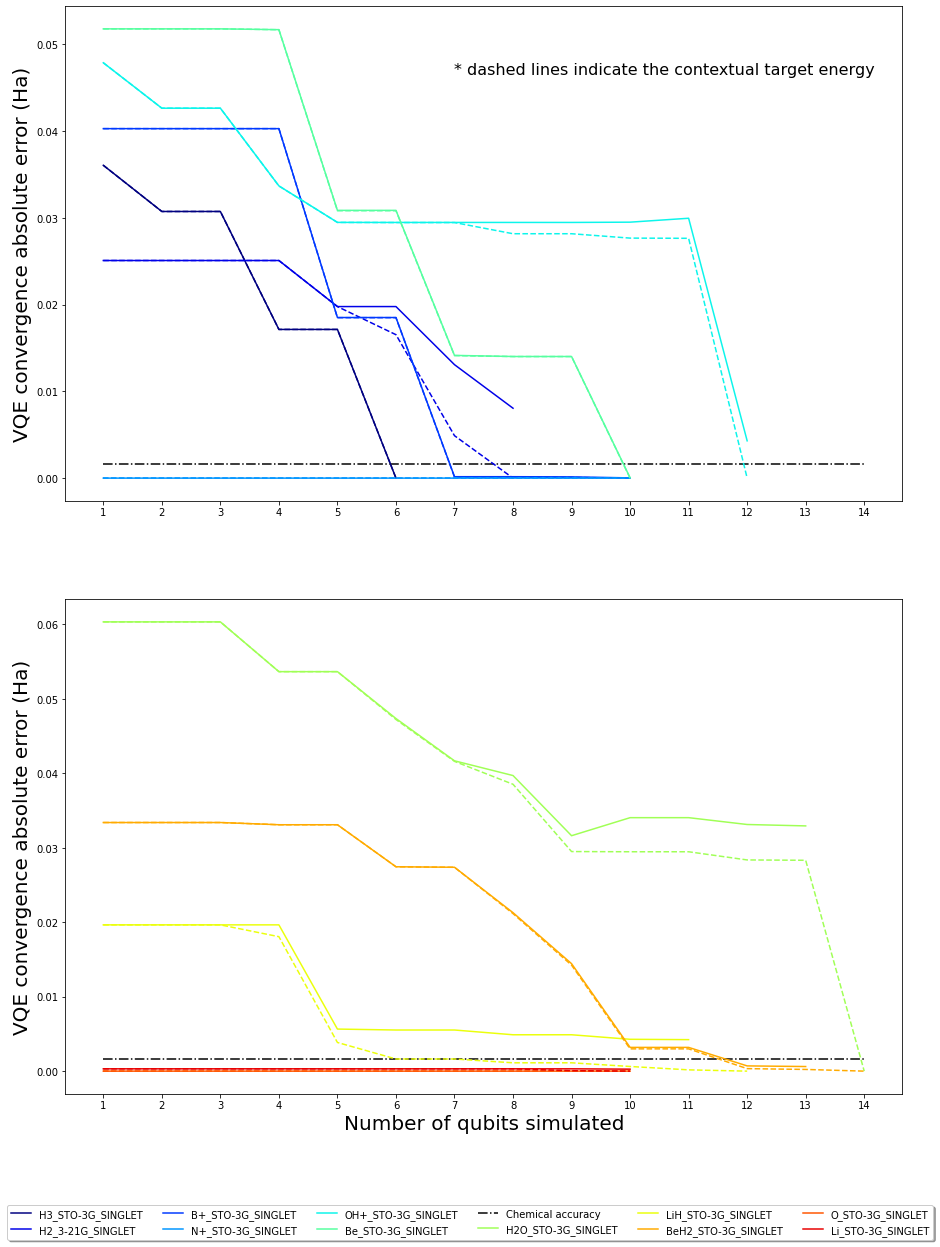

In [14]:
mol_data = {}

fig, axis = plt.subplots(ncols=1, nrows=2, figsize=(15, 20))


for index, file in enumerate(mol_data_sets):
    with open('data/final/'+file+'.json', 'r') as json_file:
        cs_vqe_data = json.load(json_file)
    name_end = find_nth(file, '_', 3)
    speciesname = file[:name_end]
    result_error = []
    target_error = []
    for g in cs_vqe_data['grid_pos']:
        run_index = '('+str(g)[1:-1]+')'
        try:
            result_error.append(cs_vqe_data[run_index]['result'] - cs_vqe_data['true_gs'])
            target_error.append(cs_vqe_data[run_index]['target'] - cs_vqe_data['true_gs'])
        except:
            target_error.append(0)
            
    c = plt.cm.jet(index/len(mol_data_sets))
    qubit_nums_1 = list(range(1, len(result_error)+1))
    qubit_nums_2 = list(range(1, cs_vqe_data['num_qubits']+1))
    
    if index<len(mol_data_sets)/2:
        grid = 0
    else:
        grid = 1
    axis[grid].plot(qubit_nums_1, result_error, label=speciesname, color=c)
    axis[grid].plot(qubit_nums_2, target_error, color=c, ls='--')
    #mol_data[speciesname] = {'qubit_nums':qubit_nums,
    #                         'errors':errors}

    axis[grid].set_xticks(list(range(1, 15)))
    axis[grid].set_ylabel('VQE convergence absolute error (Ha)', fontsize=20)



axis[1].hlines(0.0016, 1, 14, color='black', ls='-.')
    
axis[0].text(7, 0.0465, '* dashed lines indicate the contextual target energy', fontsize=16)
axis[1].set_xlabel('Number of qubits simulated', fontsize=20)    
axis[0].hlines(0.0016, 1, 14, label='Chemical accuracy', color='black', ls='-.')

fig.legend(loc='lower center',bbox_to_anchor=(0.5, 0.02),
          fancybox=True, shadow=True, ncol=6)

In [27]:
fig.savefig('plots/final/comparison.png', dpi=300, bbox_inches='tight')

In [2]:
from itertools import product

In [17]:
[0,1,2,3,4,5][-4:]

[2, 3, 4, 5]

In [6]:
all([None, None, None])

False

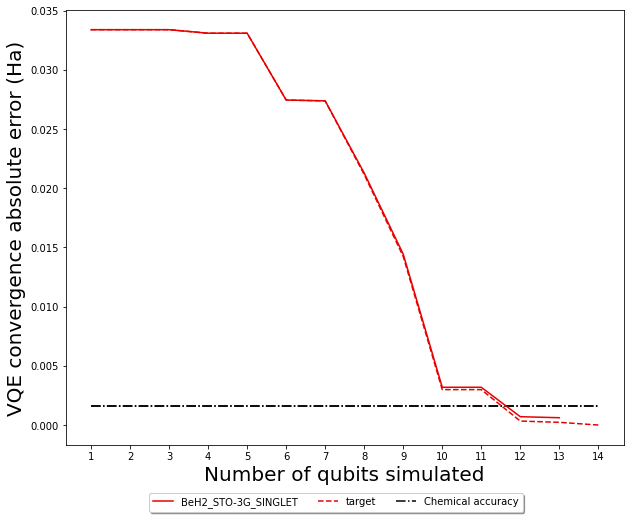

In [27]:
mol_data = {}

fig, axis = plt.subplots(figsize=(10, 8))

file="BeH2_STO-3G_SINGLET_UCCSD_CS-VQE_convergence_projected_ansatz"
with open('data/final/BeH2_STO-3G_SINGLET_UCCSD_CS-VQE_convergence_projected_ansatz.json', 'r') as json_file:
    cs_vqe_data = json.load(json_file)
name_end = find_nth(file, '_', 3)
speciesname = file[:name_end]
result_error = []
target_error = []
for g in cs_vqe_data['grid_pos']:
    run_index = '('+str(g)[1:-1]+')'
    try:
        result_error.append(cs_vqe_data[run_index]['result'] - cs_vqe_data['true_gs'])
        target_error.append(cs_vqe_data[run_index]['target'] - cs_vqe_data['true_gs'])
    except:
        target_error.append(0)

c = plt.cm.jet(index/len(mol_data_sets))
qubit_nums_1 = list(range(1, len(result_error)+1))
qubit_nums_2 = list(range(1, cs_vqe_data['num_qubits']+1))

if index<len(mol_data_sets)/2:
    grid = 0
else:
    grid = 1
axis.plot(qubit_nums_1, result_error, label=speciesname, color=c)
axis.plot(qubit_nums_2, target_error, label='target',color=c, ls='--')
#mol_data[speciesname] = {'qubit_nums':qubit_nums,
#                         'errors':errors}

axis.set_xticks(list(range(1, 15)))
axis.set_ylabel('VQE convergence absolute error (Ha)', fontsize=20)



axis.hlines(0.0016, 1, 14, color='black', ls='-.')
    
axis.set_xlabel('Number of qubits simulated', fontsize=20)    
axis.hlines(0.0016, 1, 14, label='Chemical accuracy', color='black', ls='-.')

fig.legend(loc='lower center',bbox_to_anchor=(0.5, 0.0),
          fancybox=True, shadow=True, ncol=6)

In [28]:
fig.savefig('plots/final/BeH2_CS-VQE_error.png', dpi=300, bbox_inches='tight')